# Imports.

In [1]:
import pandas as pd
import numpy as np

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For Encoding
from sklearn.preprocessing import OrdinalEncoder

# Uploading Dataset.

In [2]:
# Mounting drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Uploading dataset
df = pd.read_csv('/content/drive/MyDrive/Pod 4/Work and Self-Rated Mental Health Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1576 non-null   object 
 1   gender                    1576 non-null   object 
 2   covid_distancing          1576 non-null   object 
 3   covid_masks               1576 non-null   object 
 4   vaccinated                1576 non-null   object 
 5   self_rated_mental_health  1576 non-null   object 
 6   ethnicity                 1576 non-null   object 
 7   hours                     1576 non-null   float64
 8   occupation                1576 non-null   object 
 9   work_from_home            1576 non-null   object 
 10  income                    1576 non-null   object 
 11  educational_attainment    1576 non-null   object 
dtypes: float64(1), object(11)
memory usage: 147.9+ KB


# Data Cleaning.

In [4]:
# Since there is no null values and no columns we want to drop we set df equal to df_clean
df_clean = df

# Data Encoding.

It's important for us to encode certain columns using different encoding methods because particular methods represent the original data more accurately than others. Hence, models interpret them more correctly or can find correlation. (ie, it's not a one size fits all)

In [5]:
df_clean.head()

,age,gender,covid_distancing,covid_masks,vaccinated,self_rated_mental_health,ethnicity,hours,occupation,work_from_home,income,educational_attainment
0,40 to 49 years-old,Non-binary,Very Closely,Very Closely,"Yes, two doses",Positive,"African, Caribbean, or Black",10.0,"education, law and social, community, and gove...",Hybrid,"$60,000 to $89,999",Bachelor's Degree or Higher
1,18 to 29 years-old,Woman,Somewhat,Very Closely,"Yes, one dose",Positive,"African, Caribbean, or Black",6.0,Management,Hybrid,"Less than $30,000",Some College
2,30 to 39 years-old,Man,Somewhat,Somewhat,"Yes, one dose",Positive,Middle Eastern,2.0,Business,Hybrid,"Less than $30,000",Bachelor's Degree or Higher
3,60 years and older,Woman,Somewhat,Very Closely,"Yes, two doses",Positive,White,40.0,Management,Hybrid,"$30,000 to $59,999",Bachelor's Degree or Higher
4,30 to 39 years-old,Man,Somewhat,Not at all,No,Negative,Other,7.0,Business,Hybrid,"$30,000 to $59,999",Bachelor's Degree or Higher


In [6]:
# Splitting columns into ones to one-hot encode versus label encode
# (nominal -> there's no ranking or natural order VS ordinal -> there is an order or natural ranking)
nominal_cols = ['gender', 'self_rated_mental_health', 'ethnicity', 'occupation', 'work_from_home']
ordinal_cols = ['age','covid_distancing', 'covid_masks', 'vaccinated', 'income', 'educational_attainment']

# One Hot Encoding Nominal:

# Encoding nominal_cols using One-Hot-Encoding
df_encoded = pd.get_dummies(df_clean, columns = nominal_cols)

# Label Encoding Ordinal:

# Custom orders for each column
custom_orders = [
    ['18 to 29 years-old', '30 to 39 years-old', '40 to 49 years-old', '50 to 59 years-old', '60 years and older'],  # 'Order for "age"
    ['Not at all', 'Somewhat', 'Very Closely'],   # Order for "covid_distancing"
    ['Not at all', 'Somewhat', 'Very Closely'],   # Order for "covid_masks"
    ['No', 'Yes, one dose', 'Yes, two doses'],   # Order for "vaccinated"
    ['Less than $30,000', '$30,000 to $59,999', '$60,000 to $89,999', '$90,000 or more'],    # Order for "income"
    ['High School Diploma or Lower', 'Some College', "Bachelor's Degree or Higher"],    # Order for "educational_attainment"
]

# Apply OrdinalEncoder with custom orders
encoder = OrdinalEncoder(categories=custom_orders)
encoded_ordinal_cols = encoder.fit_transform(df_encoded[ordinal_cols])

# Add the encoded columns to the DataFrame
df_encoded[ordinal_cols] = encoded_ordinal_cols

# Check the assigned values for each column
for col, categories in zip(df_encoded[ordinal_cols], encoder.categories_):
    print(f"\nMappings for '{col}':")
    for idx, category in enumerate(categories):
        print(f"  {category}: {idx}")

# Dropping 'self_rated_mental_health_Positive' since it is the opposite of our target/duplicate from encoding
df_encoded = df_encoded.drop(columns='self_rated_mental_health_Negative')

# Viewing encoded data
print(" ")
df_encoded.info()
print(" ")
df_encoded.head()
# add male column
#class weights parameter lower gamma



Mappings for 'age':
  18 to 29 years-old: 0
  30 to 39 years-old: 1
  40 to 49 years-old: 2
  50 to 59 years-old: 3
  60 years and older: 4

Mappings for 'covid_distancing':
  Not at all: 0
  Somewhat: 1
  Very Closely: 2

Mappings for 'covid_masks':
  Not at all: 0
  Somewhat: 1
  Very Closely: 2

Mappings for 'vaccinated':
  No: 0
  Yes, one dose: 1
  Yes, two doses: 2

Mappings for 'income':
  Less than $30,000: 0
  $30,000 to $59,999: 1
  $60,000 to $89,999: 2
  $90,000 or more: 3

Mappings for 'educational_attainment':
  High School Diploma or Lower: 0
  Some College: 1
  Bachelor's Degree or Higher: 2
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 30 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   age                                                             

,age,covid_distancing,covid_masks,vaccinated,hours,income,educational_attainment,gender_Man,gender_Non-binary,gender_Woman,...,occupation_Manufacturing and utilities,occupation_Natural and applied sciences,occupation_Natural resources and agriculture,occupation_Sales and service,"occupation_Trades, transport and equipment operators","occupation_art, culture, recreation and sport","occupation_education, law and social, community, and government services",work_from_home_Do Not Work from Home,work_from_home_Hybrid,work_from_home_Work from Home Only
0,2.0,2.0,2.0,2.0,10.0,2.0,2.0,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0.0,1.0,2.0,1.0,6.0,0.0,1.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,1.0,1.0,1.0,1.0,2.0,0.0,2.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,4.0,1.0,2.0,2.0,40.0,1.0,2.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,1.0,1.0,0.0,0.0,7.0,1.0,2.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False


#Kernel PCA.

In [7]:
# Imports.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

# Setting target to our target column -> 'self_rated_mental_health_Negative'
target = ('self_rated_mental_health_Positive')

# Define features (X) and target (y)
X = df_encoded.drop(columns=[target])  # Features
y = df_encoded[target]  # Target variable

# Standardize the data (PCA assumes data is centered and scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA (non-linear dimensionality reduction)
kpca = KernelPCA(n_components=25, kernel='rbf', gamma=0.2)  # Try 'poly', 'sigmoid', etc.
X_kpca = kpca.fit_transform(X_scaled)

# Create a DataFrame of new PCA features
n_components=25
kpca_features = pd.DataFrame(X_kpca, columns=[f"PC{i+1}" for i in range(n_components)])

# Print the first few rows
print(kpca_features.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.018767 -0.017264  0.005590  0.005601 -0.010012 -0.026598  0.000481   
1 -0.021464 -0.020025  0.007888  0.009588 -0.016108 -0.026633  0.000394   
2 -0.019260 -0.017844  0.005849  0.005857 -0.010485 -0.027933  0.000509   
3 -0.022784 -0.023028  0.005555  0.013058 -0.034620  0.007094 -0.000730   
4 -0.018979 -0.017393  0.005834  0.005694 -0.010395 -0.027534  0.000525   

        PC8       PC9      PC10  ...      PC16      PC17      PC18      PC19  \
0 -0.018293 -0.017641 -0.005618  ... -0.003880 -0.008278 -0.006226 -0.000157   
1 -0.021173 -0.024061 -0.009541  ...  0.014351 -0.001478 -0.005618 -0.001003   
2 -0.019383 -0.018742 -0.005973  ... -0.004310 -0.009249 -0.006962 -0.000177   
3 -0.004486 -0.030289 -0.010412  ...  0.125782  0.042451  0.015752 -0.005137   
4 -0.019261 -0.018350 -0.005515  ... -0.004176 -0.009218 -0.006298 -0.000200   

       PC20      PC21      PC22      PC23      PC24      PC25  
0 -0

#SMOTE.

In [8]:
# Imports.
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({True: 1017, False: 243})
After SMOTE: Counter({False: 1017, True: 1017})


#Models.

In [9]:
# SVM Using RBF Kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an SVM model (using a rbf kernel)
svm_rbf_model = SVC(kernel='rbf', C=2, gamma=0.45)

# Train the model
svm_rbf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = svm_rbf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculate accuracy
print("SVM Model. RBF Kernel")
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

SVM Model. RBF Kernel
Model accuracy: 0.87
Confusion Matrix:
 [[ 24  37]
 [  4 251]]
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.39      0.54        61
        True       0.87      0.98      0.92       255

    accuracy                           0.87       316
   macro avg       0.86      0.69      0.73       316
weighted avg       0.87      0.87      0.85       316



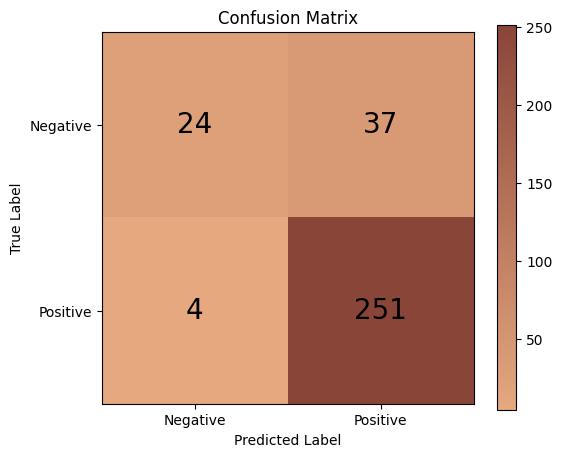

In [10]:
from matplotlib.colors import LinearSegmentedColormap

# Compute confusion matrix
cm = conf_matrix
classes = ['Negative', 'Positive']  # Adjust class labels as needed

# Define a gradient colormap with two hex colors
color1 = "#E5A87F"  # Light green
color2 = "#8A4539"  # Dark green
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", [color1, color2])

# Plot confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=custom_cmap)
plt.colorbar()

# Add labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black', fontsize=20)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
y_pred = svm_rbf_model.predict(X_train_smote)
print("Classification Report:\n", classification_report(y_train_smote, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1017
        True       1.00      1.00      1.00      1017

    accuracy                           1.00      2034
   macro avg       1.00      1.00      1.00      2034
weighted avg       1.00      1.00      1.00      2034



In [12]:
from sklearn.semi_supervised import SelfTrainingClassifier

# Create an SVM model (using a rbf kernel)
self_train_svm = SelfTrainingClassifier(SVC(kernel='rbf', C=2, gamma=0.1, probability=True))

# Train the model
self_train_svm.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = svm_rbf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculate accuracy
print("SVM Model. RBF Kernel")
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

/usr/local/lib/python3.11/dist-packages/sklearn/semi_supervised/_self_training.py:288: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SVM Model. RBF Kernel
Model accuracy: 0.87
Confusion Matrix:
 [[ 24  37]
 [  4 251]]
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.39      0.54        61
        True       0.87      0.98      0.92       255

    accuracy                           0.87       316
   macro avg       0.86      0.69      0.73       316
weighted avg       0.87      0.87      0.85       316

